<a href="https://colab.research.google.com/github/ekyaaa/2341720111_ML_2025/blob/main/JS13/P1_JS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah:

    - Buat dataset sederhana (XOR).
    - Inisialisasi bobot dan bias.
    - Implementasikan forward pass.
    - Hitung error dan lakukan backpropagation.
    - Update bobot menggunakan gradient descent.



In [1]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.2506624262583864
Epoch 1000, Loss: 0.24961668124181705
Epoch 2000, Loss: 0.2471654328105442
Epoch 3000, Loss: 0.22763869437683726
Epoch 4000, Loss: 0.1937407252214931
Epoch 5000, Loss: 0.17984930026164775
Epoch 6000, Loss: 0.17399463028600354
Epoch 7000, Loss: 0.16916778954511763
Epoch 8000, Loss: 0.13637582401580284
Epoch 9000, Loss: 0.04160555881553811
Prediksi:
[[0.08378641]
 [0.88551811]
 [0.88550872]
 [0.16217314]]


## Tugas 1:

    - Ubah jumlah neuron hidden layer menjadi 3.
    - Bandingkan hasil loss dengan konfigurasi awal.
    - Tambahkan fungsi aktivasi ReLU dan bandingkan hasil.



EKSPERIMEN 1: Hidden Layer 3 Neuron (Sigmoid)
Epoch 0, Loss: 0.267344
Epoch 2000, Loss: 0.159420
Epoch 4000, Loss: 0.135075
Epoch 6000, Loss: 0.125344
Epoch 8000, Loss: 0.016451

Prediksi (3 neuron):
[[0.06409205]
 [0.93737155]
 [0.90590141]
 [0.0976241 ]]

Loss Akhir (3 neuron): 0.006604

EKSPERIMEN 2: ReLU vs Sigmoid (2 Hidden Neurons)
Epoch 0, Loss: 0.250004
Epoch 2000, Loss: 0.166898
Epoch 4000, Loss: 0.166734
Epoch 6000, Loss: 0.166707
Epoch 8000, Loss: 0.166693

Prediksi (ReLU):
[[0.33345512]
 [0.33345512]
 [0.99103679]
 [0.33345512]]

Loss Akhir (ReLU): 0.166687


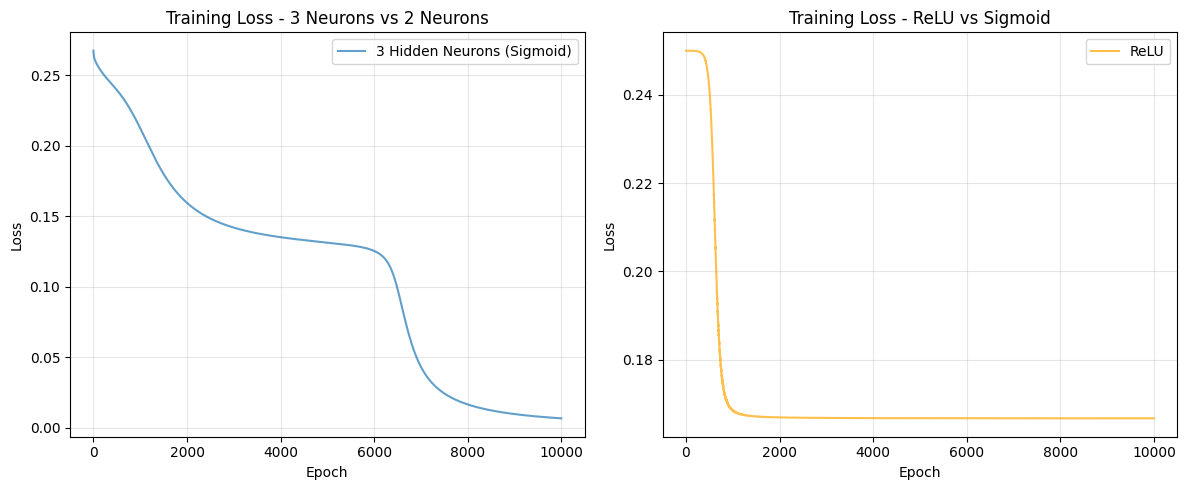

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

print("=" * 60)
print("EKSPERIMEN 1: Hidden Layer 3 Neuron (Sigmoid)")
print("=" * 60)

# Parameter dengan 3 hidden neurons
input_size = 2
hidden_size = 3  # Ubah dari 2 menjadi 3
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

loss_history_3n = []

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2
    loss = np.mean(np.square(error))
    loss_history_3n.append(loss)

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print("\nPrediksi (3 neuron):")
print(a2)
print(f"\nLoss Akhir (3 neuron): {loss:.6f}")

print("\n" + "=" * 60)
print("EKSPERIMEN 2: ReLU vs Sigmoid (2 Hidden Neurons)")
print("=" * 60)

# ReLU activation
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Reset untuk ReLU
hidden_size = 2
W1_relu = np.random.randn(input_size, hidden_size) * 0.01
b1_relu = np.zeros((1, hidden_size))
W2_relu = np.random.randn(hidden_size, output_size) * 0.01
b2_relu = np.zeros((1, output_size))

loss_history_relu = []

for epoch in range(10000):
    # Forward pass dengan ReLU
    z1 = np.dot(X, W1_relu) + b1_relu
    a1 = relu(z1)
    z2 = np.dot(a1, W2_relu) + b2_relu
    a2 = sigmoid(z2)  # Output tetap sigmoid untuk binary classification

    error = y - a2
    loss = np.mean(np.square(error))
    loss_history_relu.append(loss)

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2_relu.T) * relu_derivative(z1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    W1_relu += lr * d_W1
    b1_relu += lr * d_b1
    W2_relu += lr * d_W2
    b2_relu += lr * d_b2

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print("\nPrediksi (ReLU):")
print(a2)
print(f"\nLoss Akhir (ReLU): {loss:.6f}")

# Visualisasi perbandingan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history_3n, label='3 Hidden Neurons (Sigmoid)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss - 3 Neurons vs 2 Neurons')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(loss_history_relu, label='ReLU', color='orange', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss - ReLU vs Sigmoid')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Kesimpulan

    - Loss akhir dengan 3 neuron (Sigmoid): 0.006604
    - Loss akhir dengan ReLU: 0.166687

Dengan 3 neuron, model memiliki kapasitas lebih besar untuk belajar. ReLU dapat mempercepat konvergensi pada beberapa kasus.